In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.shape

(9426, 24)

In [6]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

C:\Users\ukilsk\AppData\Local\Temp\ipykernel_6432\4106132844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


In [8]:
dataset.info() #...... showing the data nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# Order Priority

In [9]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
dataset['Order Priority'] = dataset["Order Priority"].replace("Critical ","Critical")

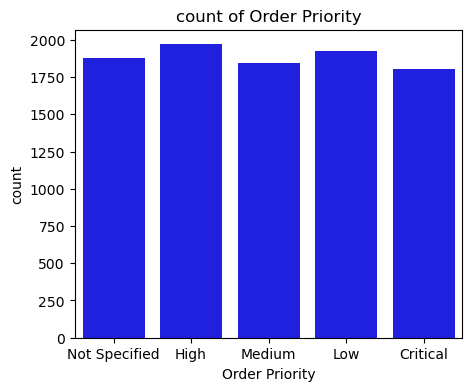

In [12]:
plt.figure(figsize=(5,4))
plt.title("count of Order Priority") 
sns.countplot(x="Order Priority",data=dataset,color='b')
plt.savefig("count of Order Priority.jpg")
plt.show()

# Ship Mode

In [13]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

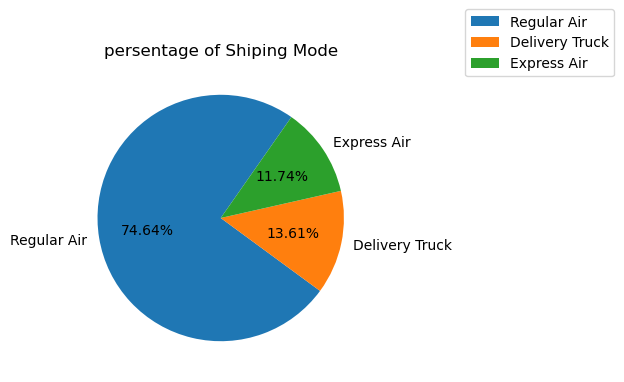

In [15]:
plt.figure(figsize=(5,4))
plt.title("persentage of Shiping Mode")
plt.pie(y,labels=x,startangle =55,autopct= "%0.2f%%")
plt.legend ( loc = "upper right" , bbox_to_anchor=(1.8,1.2))
plt.show()


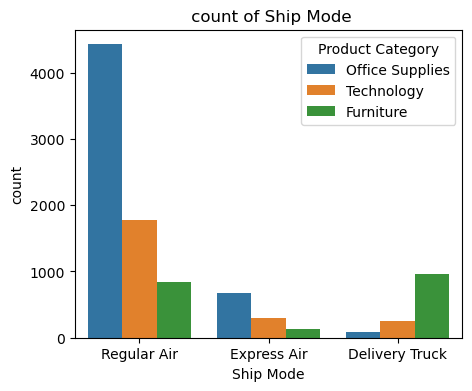

In [17]:
# bybatter analysis
plt.figure(figsize=(5,4))
plt.title(" count of Ship Mode")
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Customer Segment

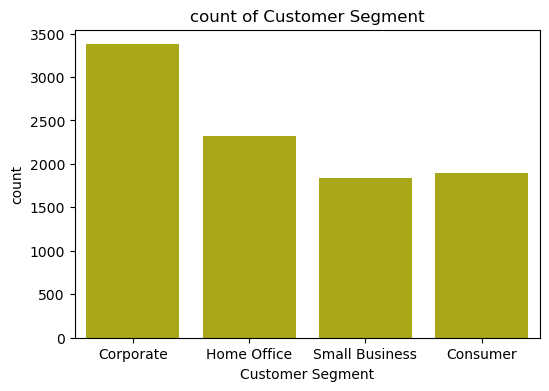

In [18]:
plt.figure(figsize=(6,4))
plt.title("count of Customer Segment")
sns.countplot(x="Customer Segment",data=dataset,color='y')
plt.show()

# Product Category

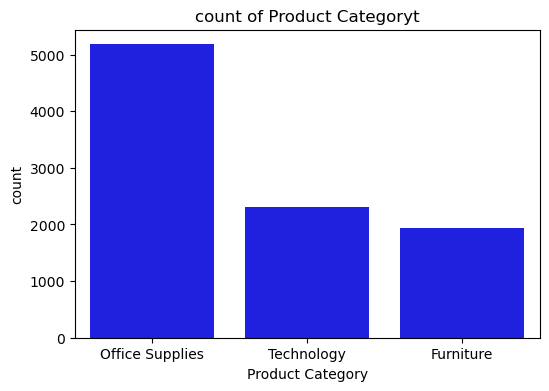

In [19]:
plt.figure(figsize=(6,4))
plt.title("count of Product Categoryt")
sns.countplot(x="Product Category",data=dataset,color='b')
plt.show()

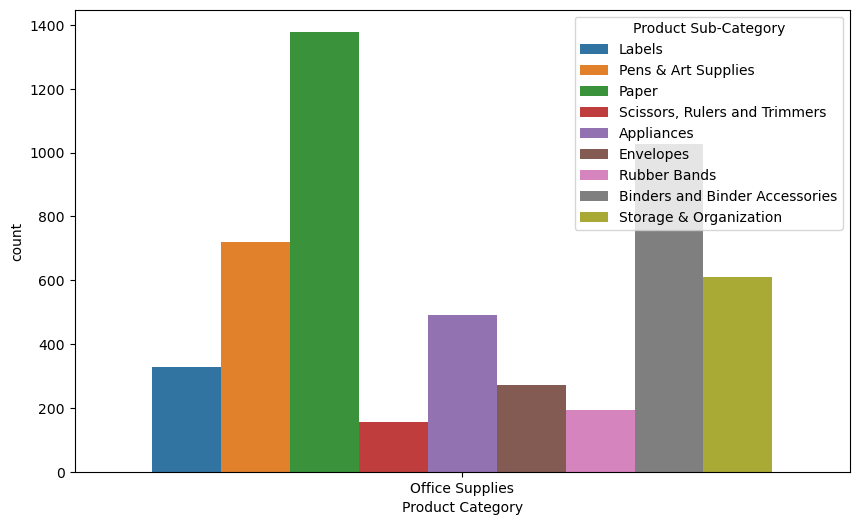

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.show()


# Order years

In [21]:
dataset['Order Date'].value_counts()

Order Date
2013-07-21    24
2013-03-28    23
2012-09-15    23
2013-07-09    22
2012-06-22    21
              ..
2010-12-31     1
2010-03-07     1
2010-07-25     1
2012-09-21     1
2013-05-15     1
Name: count, Length: 1419, dtype: int64

In [22]:
dataset["Order Date"] = dataset['Order Date'].dt.year #new columns need for only years

In [23]:
dataset.shape

(9426, 24)

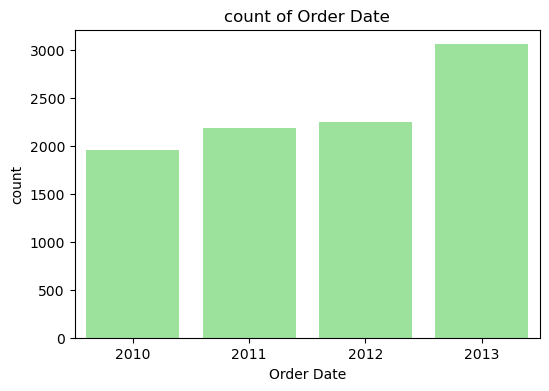

In [26]:
plt.figure(figsize=(6,4))
plt.title("count of Order Date")
sns.countplot(x="Order Date",data=dataset,color='lightgreen')
plt.show()

# Profit

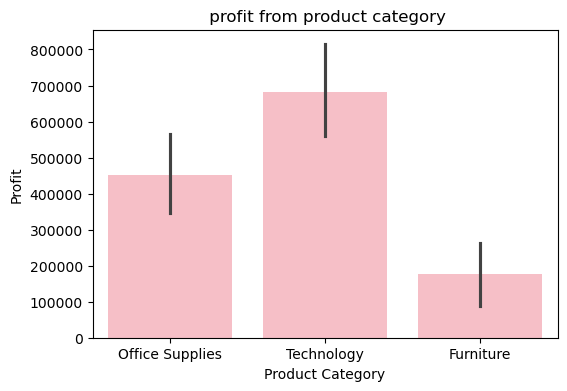

In [27]:
plt.figure(figsize=(6,4))
plt.title(" profit from product category")
sns.barplot(x="Product Category",y="Profit",data=dataset,color='lightpink',estimator ='sum')
plt.show()

# State or Province

In [28]:
dataset['State or Province'].value_counts()[ :5] #top 5

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [29]:
a = dataset['State or Province'].value_counts().index[:10]          #top 10 state
b = dataset['State or Province'].value_counts().values[:10]

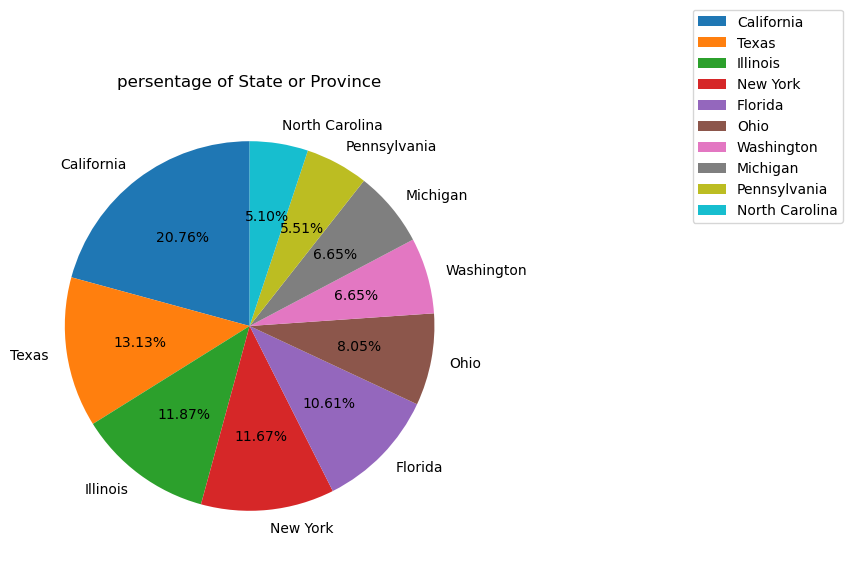

In [30]:
plt.figure(figsize=(10,6))
plt.title("persentage of State or Province")
plt.pie(b,labels=a,startangle =90,autopct= "%0.2f%%")
plt.legend ( loc = "upper right" , bbox_to_anchor=(1.8,1.2))
plt.show()

#  Product Base Margin

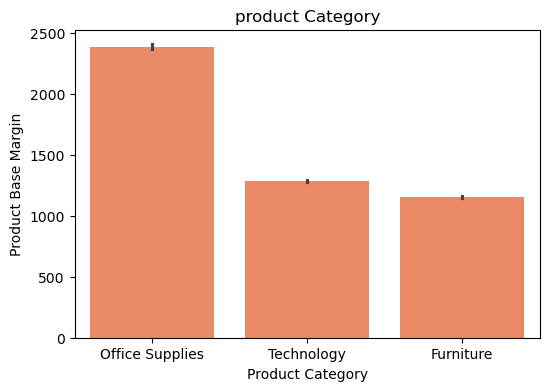

In [31]:
plt.figure(figsize=(6,4))
plt.title("product Category")
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,color='coral',estimator ='sum')
plt.show()